In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

url = './src/result_processing/Simulation/Menor frecuencia'

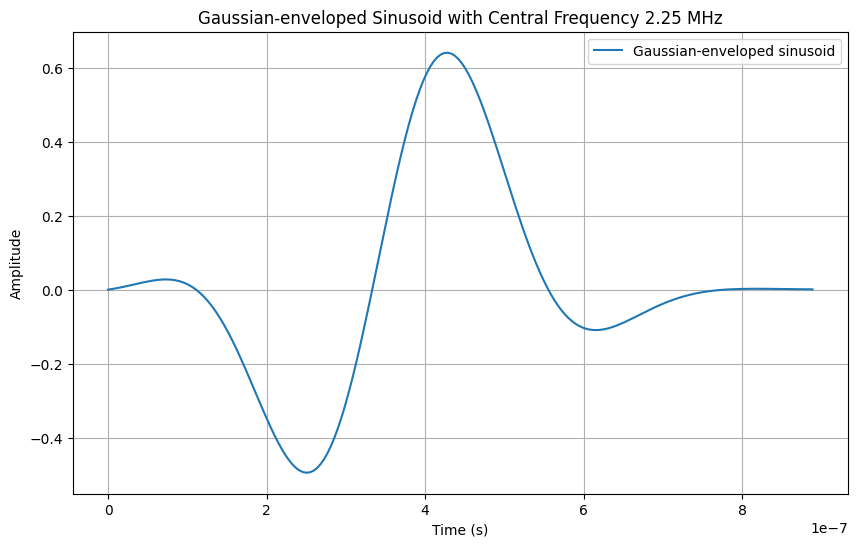

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the central frequency in Hz
f = 2.25e6  # 2.25 MHz

# Define the time array for one period
T = 1 / f  # Period of the sinusoid
t = np.linspace(0, 2*T, 200)  # Time array with 1000 points

# Define the Gaussian-enveloped sinusoid function
def S(t):
    return f * t * np.exp(-(2 * np.pi * f * t / 3 - 1.4)**2) * np.cos(2 * np.pi * f * t)

# Calculate the signal values
signal = S(t)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Gaussian-enveloped sinusoid')
plt.title('Gaussian-enveloped Sinusoid with Central Frequency 2.25 MHz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [2]:
datos = []
mayores = []
time = []
new_times = []

steps_750_nodes_300_dt_0.001_geo_unit_0%_layer_n_32.npy


TypeError: 'Axes' object is not subscriptable

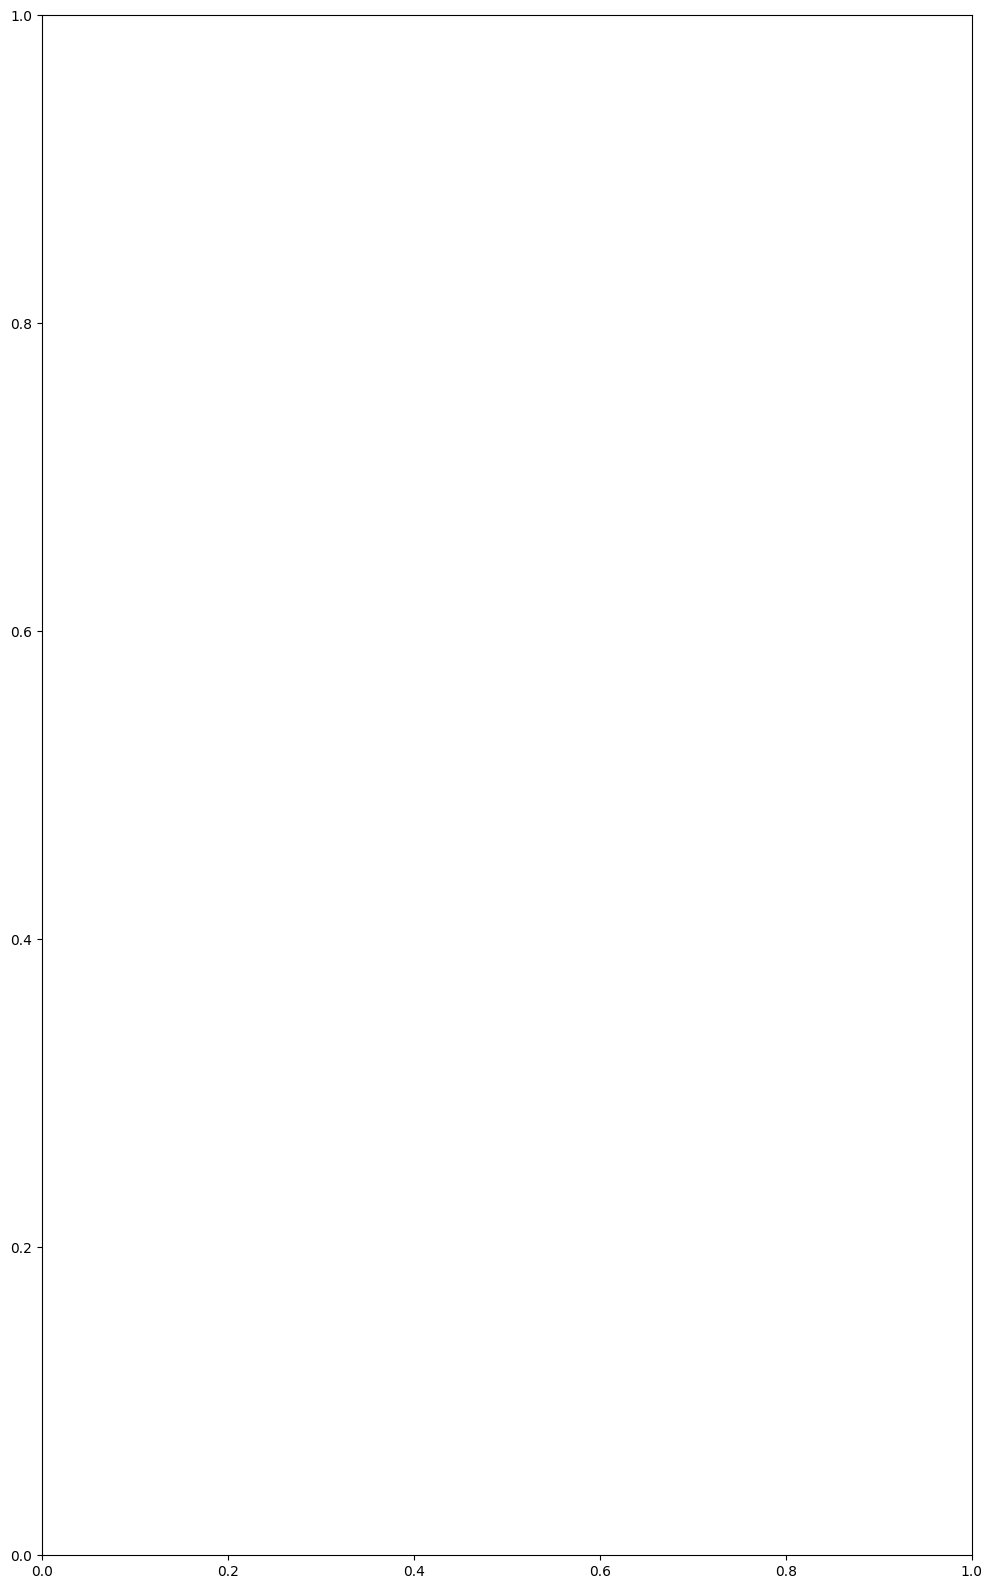

In [3]:
fig, axs = plt.subplots(1,1, figsize=(12,20))

i=0
c=0
for i, archivo in enumerate(os.listdir(url)):

    ruta = os.path.join(url, archivo)
    if os.path.isfile(ruta) and archivo.endswith('.npy'):
        data = np.load(ruta)
        ultimo_nodo=data[-1,:]
        datos.append(ultimo_nodo)
        valor = ultimo_nodo.max()
        mayores.append(valor)
        pos = np.where(ultimo_nodo == valor)
        time.append(pos)
        print(archivo)
        # Generar el tiempo en el eje x (posiciones multiplicadas por 1e-4)
        tiempo = np.arange(len(ultimo_nodo)) * 1e-4
        
        # Graficar en el subplot correspondiente
        axs[c].plot(tiempo, ultimo_nodo)  # tiempo en el eje x
        axs[c].set_title(f'SOC {c}%')
        axs[c].set_xlabel('Tiempo (s)')
        axs[c].set_ylabel('Valor')

        # Incrementar el contador para subplots
        c += 1

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

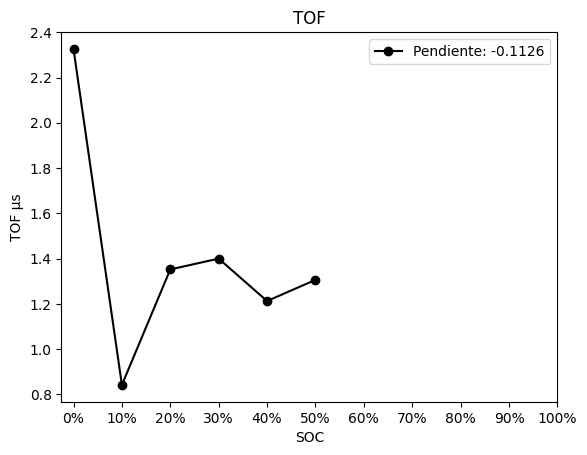

Pendiente: -0.1126


In [4]:
import numpy as np 

valores = [tupla[0][0] for tupla in time]
valores = [v*1e-4 for v in valores]
x = np.arange(len(valores))  # Crear los valores de x según la longitud de 'valores'
pendiente, intercepto = np.polyfit(x, valores, 1)  # Pendiente y el intercepto de la línea ajustada
plt.plot(valores, 'o-', color='black', label=f'Pendiente: {pendiente:.4f}')  # Mostrar la pendiente en la leyenda
plt.title("TOF")  # Título del gráfico
plt.xlabel("SOC")  # Etiqueta para el eje X
plt.ylabel("TOF µs")  # Etiqueta para el eje Y
plt.legend()

# Configurar los valores del eje X de 0 a 10, pero etiquetar de 0% a 100%
plt.xticks(ticks=range(0, 11), labels=[f'{i * 10}%' for i in range(0, 11)])

plt.show()  # Mostrar el gráfico
print(f"Pendiente: {pendiente:.4f}")